# NYC taxis tips

In [1]:
import os
_REP_PATH_ = os.getcwd()

## Importation des données

In [2]:
import pandas as pd 

train_df = pd.read_parquet(_REP_PATH_ + '/data/train.parquet')
test_df = pd.read_parquet(_REP_PATH_ + '/data/test.parquet')

train_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon
0,1,2024-01-15 20:37:28,2024-01-15 20:56:43,1.0,3.30,1.0,N,1,19.1,3.5,0.5,4.80,0.0,1.0,2.5,0.0,40.734576,-74.002875,40.768615,-73.965635
1,2,2024-01-25 19:41:24,2024-01-25 19:44:42,1.0,0.72,1.0,N,1,5.8,2.5,0.5,2.46,0.0,1.0,2.5,0.0,40.768615,-73.965635,40.780436,-73.957012
2,2,2024-01-25 15:48:48,2024-01-25 16:24:23,2.0,7.45,1.0,N,1,38.7,0.0,0.5,3.00,0.0,1.0,2.5,0.0,40.717773,-74.007880,40.780436,-73.957012
3,2,2024-01-27 00:47:26,2024-01-27 00:55:55,1.0,1.53,1.0,N,1,10.0,1.0,0.5,2.25,0.0,1.0,2.5,0.0,40.720889,-73.996919,40.747746,-73.978492
4,2,2024-01-28 13:14:26,2024-01-28 13:22:34,1.0,1.53,1.0,N,1,10.0,0.0,0.5,3.50,0.0,1.0,2.5,0.0,40.768615,-73.965635,40.747746,-73.978492


In [3]:
train_df['trip_duration'] = (train_df['tpep_dropoff_datetime'] - train_df['tpep_pickup_datetime']).astype('int64') // 10**9 // 60 #en minute
test_df['trip_duration'] = (test_df['tpep_dropoff_datetime'] - test_df['tpep_pickup_datetime']).astype('int64') // 10**9 // 60 #en minute

In [4]:
# On extrait les variables qui nous intéresse sans les dates qui seront convertis en minutes
X_train = train_df.drop(columns= ['tip_amount','tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']) 
X_test = test_df.drop(columns= ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag'])

Y_train = train_df['tip_amount']

X_train.head()

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon,trip_duration
0,1,1.0,3.30,1.0,1,19.1,3.5,0.5,0.0,1.0,2.5,0.0,40.734576,-74.002875,40.768615,-73.965635,19
1,2,1.0,0.72,1.0,1,5.8,2.5,0.5,0.0,1.0,2.5,0.0,40.768615,-73.965635,40.780436,-73.957012,3
2,2,2.0,7.45,1.0,1,38.7,0.0,0.5,0.0,1.0,2.5,0.0,40.717773,-74.007880,40.780436,-73.957012,35
3,2,1.0,1.53,1.0,1,10.0,1.0,0.5,0.0,1.0,2.5,0.0,40.720889,-73.996919,40.747746,-73.978492,8
4,2,1.0,1.53,1.0,1,10.0,0.0,0.5,0.0,1.0,2.5,0.0,40.768615,-73.965635,40.747746,-73.978492,8


### Correlation

In [5]:
correlation_matrix = train_df.drop(columns= ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']).corr()

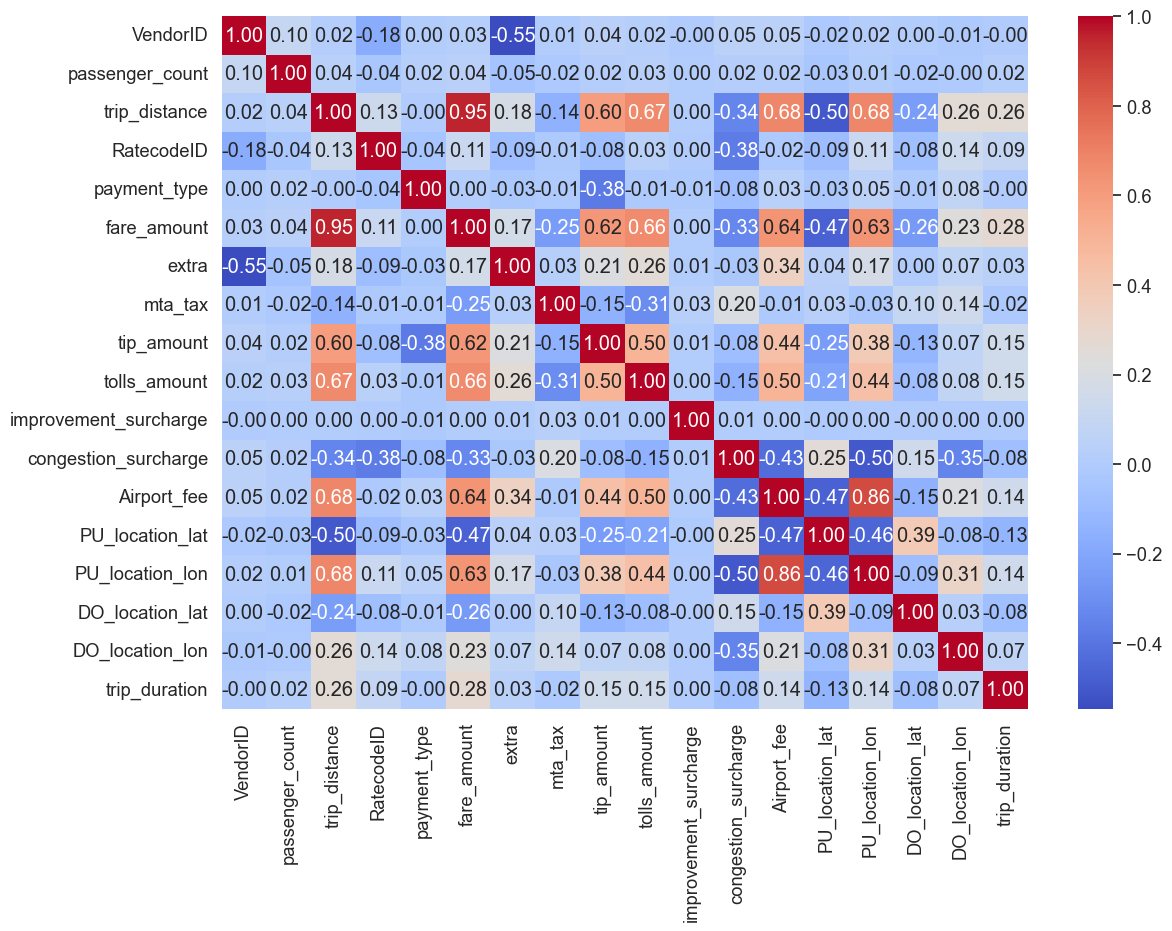

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création de la heatmap
plt.figure(figsize=(13,9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Afficher le graphique
plt.show()

### Étude des données en ACP

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

In [7]:
mypca = PCA(n_components= 5)

mypca.fit(X_train_standardized)

# Pourcentage de la variance expliquée par chacune des composantes sélectionnées.
print(mypca.singular_values_) # Valeurs de variance
print(mypca.explained_variance_ratio_) #  Pourcentages

# Résultats de l'ACP
data_sortie= mypca.fit_transform(X_train_standardized)

# Bruit estimé lié à la covariance
print(mypca.noise_variance_)

[676.94425704 399.99825449 381.18998305 357.39994667 335.50876947]
[0.2695609  0.09411683 0.085474   0.07513807 0.06621537]
0.5801234811051043


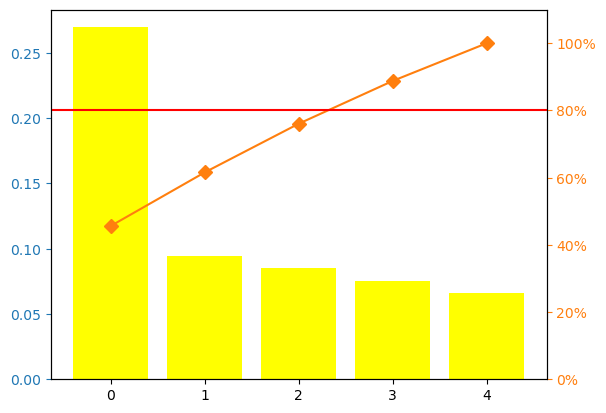

In [8]:
from matplotlib.ticker import PercentFormatter

def pareto(data) :

    y = list(data)
    x = range(len(data))
    
    ycum = np.cumsum(y)/sum(y)*100

    fig, ax = plt.subplots()
    ax.bar(x,y,color="yellow")
    ax2 = ax.twinx()
    ax2.plot(x,ycum, color="C1", marker="D", ms=7)
    ax2.axhline(y=80,color="r")
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")

    plt.ylim(0,110)
    plt.show()

pareto(mypca.explained_variance_ratio_)

$\underline{\textit{Observation :}}$ Un diagramme de pareto permet de s'assurer que les composantes retenues retiendront bien la majorité de la variabilité. Pour qu'un pareto soir pertinaent, il ne fait pas fixer le nombre de composante retenues sinon on ignore volontairement une partie de la variance perdu. Mes 4 premières composantes absorbent bien la majorité de la variabilité. 

In [9]:
loadings = mypca.components_.T * np.sqrt(mypca.explained_variance_)

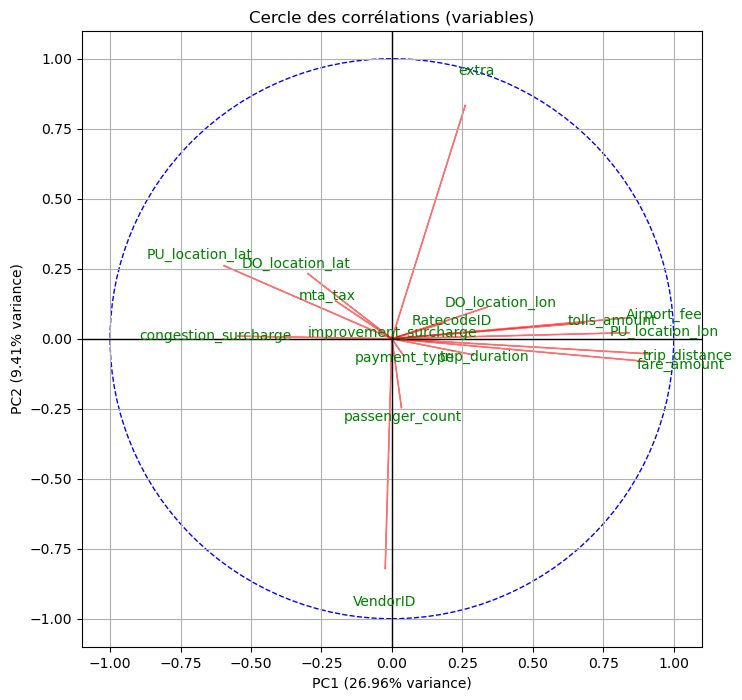

In [10]:
def plot_correlation_circle(loadings, labels, pca, axis):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    axe1, axe2 = axis

    # Définir un cercle de référence pour mieux visualiser
    circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', linewidth=1)
    ax.add_artist(circle)

    # Tracer les flèches pour chaque variable
    for i in range(len(loadings)):
        plt.arrow(0, 0, loadings[i, axe1], loadings[i, axe2], color='r', alpha=0.5)
        plt.text(loadings[i, axe1]*1.15, loadings[i, axe2]*1.15, labels[i], color='g', ha='center', va='center')

    # Limites et étiquettes
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.xlabel(f"PC{axe1+1} ({pca.explained_variance_ratio_[axe1]*100:.2f}% variance)")
    plt.ylabel(f"PC{axe2+1} ({pca.explained_variance_ratio_[axe2]*100:.2f}% variance)")
    plt.axhline(0, color='black',linewidth=1)
    plt.axvline(0, color='black',linewidth=1)
    plt.grid()
    plt.title('Cercle des corrélations (variables)')
    plt.show()

# Tracer le cercle des corrélations
plot_correlation_circle(loadings, labels=X_train.columns, pca=mypca, axis = (0,1))


## Regression linéaire

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# extraction des données vers un fichier .parquet

_REP_OUT_PATH_ = _REP_PATH_ + '/output/'

def export_to_parquet(filename, Y_pred):
    
    reg_df = pd.DataFrame(np.arange(len(Y_pred), dtype = int).T, columns  = ["row_ID"])
    reg_df["tip_amount"] = Y_pred

    reg_df.to_parquet(_REP_OUT_PATH_ + filename)

### R2 score : 0.57509

In [13]:
X_train_ = X_train.drop(columns = ["passenger_count", "mta_tax", "RatecodeID", "improvement_surcharge", "tolls_amount"])
X_test_ = X_test.drop(columns = ["passenger_count", "mta_tax", "RatecodeID", "improvement_surcharge", "tolls_amount"])

reg = LinearRegression().fit(X_train_, Y_train)

Y_pred = reg.predict(X_test_)

export_to_parquet("linear_regression_1.parquet", Y_pred = Y_pred)

### R2 score : 0.57509

In [19]:
reg = LinearRegression().fit(X_train, Y_train)

Y_pred = reg.predict(X_test)

export_to_parquet("linear_regression_2.parquet", Y_pred = Y_pred)

### R2 score : 